In [101]:
import numpy
from matplotlib import pyplot
import ipywidgets
%matplotlib inline


pyplot.rc('font', family='serif', size=16)

In [102]:
def rho_red_light(x, rho_max):
    rho = numpy.full_like(x, rho_max)
#    rho = rho_max*numpy.ones_like(x)
    mask = numpy.where(x<3.0)
    rho[mask] /= 2
#    rho[mask] = rho_mask / 2
    return rho

In [103]:
# set parameters
nx = 81
L = 4.0
dx = L /(nx - 1)
sigma = 1
x = numpy.linspace(0.0, L, num=nx)

rho_max = 10.0
u_max = 1.0
dt = sigma*dx/u_max
nt = 40
rho0 = rho_red_light(x, rho_max)
rho_hist = rho0.copy()

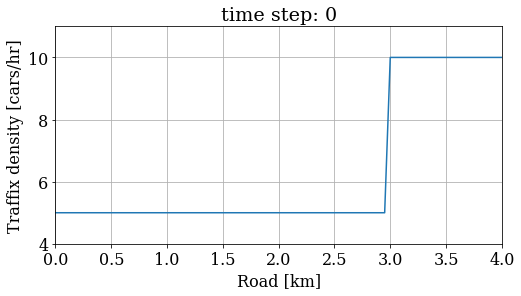

In [104]:
def plot(n, x, rho_hist):
    pyplot.figure(figsize=(8.0, 4.0))
    pyplot.grid()
    pyplot.title('time step: {}'.format(n))
    pyplot.xlabel('Road [km]')
    pyplot.ylabel('Traffix density [cars/hr]')
    pyplot.plot(x, rho_hist)
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(4.0, 11)
    pyplot.show()
plot(0, x, rho_hist)

In [105]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1 - rho / rho_max)

def traffic_flux(roh, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [106]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min =0, max=nt, step=1, description='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    
    return w

In [107]:
def lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max):
    
    rho_hist = [rho0.copy()]
    nx = len(rho0)

    for n in range(nt):
        rhon = rho.copy()
        F = traffic_flux(rho, u_max, rho_max)
        rho[1:-1] = (0.5 * (rhon[:-2]+rhon[2:]) - dt * (F[2:] - F[:-2]) / (2*dx))
        rho_hist.append(rho.copy())
    
    return rho_hist
    
    

In [112]:
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max);
interactive_plot(0,x, rho_hist)
rho_hist

TypeError: interactive_plot() takes 2 positional arguments but 3 were given

In [ ]:
def traffic_jacobian(rho, u_max, rho_max):
    
    return u_max*(1-2*rho/rho_max)

def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        
        rho[1:-1] = (rho[1:-1] - dt * (F[2:] - F[:-2]) / (2*dx))+ 
                  